In [1]:
from utils import *

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import binom
from scipy.stats import binomtest
import matplotlib.pyplot as plt


Para calcular probabilidades con la binomial tengo

* puntual :  binom.pmf(x, n, p)
* acumulada : binom.cdf(x, n, p)

## Ejercicio 1 

Ho: p=0.7 

H1: p<0.7

In [5]:
n = 15
p = 0.7
r = 7

** a - Calcular nivel de significacion del test**

In [13]:
# se rechaza cuando T<=7, alfa sera la probabildiad de reachazar H0 con H0 verdadera, entonces

alfa = binom.cdf(7,n,p)
alfa

0.05001254005377603

**b - Funcion de potencia y probabilidad tipo 2 con p=0.5 y p=0.3**

Potencia, probabilidad de rechazar Ho con Ho Falsa

In [16]:
potencia_1 = binom.cdf(7,n,0.5)
potencia_2 = binom.cdf(7,n,0.3)
print(potencia_1,potencia_2)

0.5000000000000001 0.949987459946224


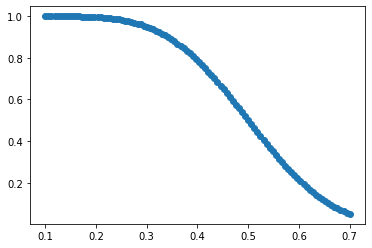

In [24]:
# No lo pide pero dibujo una funcion de potencia para ver como quedaria para mas valores de p posibles dentro de H1

potencias = []
xs = []
for x in np.linspace(0.1, 0.7, num=100):
    xs.append(x)
    potencias.append(binom.cdf(7,n,x))
plt.scatter(xs,potencias)

**c - Si en una muestra de tamaño 15 se obtuvieron 9 respuestas exitosas, concluir acerca del valor de
p. ¿Que tipo de error puede cometerse al llegar a esa conclusion?**

Uso las dos formas

In [31]:
binomtest(9, n=15, p=0.7, alternative='less')


BinomTestResult(k=9, n=15, alternative='less', proportion_estimate=0.6, pvalue=0.2783785597956361)

In [32]:
test_binomial(9,15,0.7,alfa,"izquierda")

{'nivel_significacion': 0.05001254005377603,
 'k': 8,
 'p_estimado': 0.6,
 'pvalor': 0.2783785597956361}

Como el p valor > alfa entonces, no rechazo H0. Como no rechace Ho, puede ser que este aceptando H0 siendo esta falsa, puedo estar cometiendo el error tipo 2.

## Ejercicio 2

Ho: p=0.5

H1: p<>0.5

**a - Calcular nivel de significacion del test siendo la zona de rechazo X<=2 O X>=8, es el mejor test de nivel alfa?**

Como es un test a dos colas, sabemos que no puede ser UMP, pero si dentro de los insesgados ser UMP, es decir, ser IUMP

In [10]:
n = 10
p = 0.5

In [11]:
# alfa = pbinom(X=2 U X>=8)

alfa = binom.cdf(2,n,p)+(1-binom.cdf(7,n,p))
alfa

0.109375

In [ ]:
# hay q buscar un nivel alfa aceptable, buscando por ejemplo Xs que tengan un alfa de 0.05 o menos, luego
# para un alfa dado compararlo con la funcion de pontencia
 

** b- en una muestra de 10 se obtuvieron 9 exitos, deberian ofrecerse ambas grabaciones? que error se puede estar cometiendo? calcular el p valor**

In [12]:
n = 10
r = 9

In [10]:
psombrero = r/n
psombrero

0.9

In [15]:
# Uso el test binomial bilateral

binomtest(r, n, p, alternative='two-sided')


BinomTestResult(k=9, n=10, alternative='two-sided', proportion_estimate=0.9, pvalue=0.021484375)

como el p valor = 0.62 > alfa, entonces no Rho, como no rechazo H0, no tengo evidencias para rechazar Ho, ambas grabaciones deberan ser ofrecidas.

Aca se puede estar cometiendo el error tipo 2, aceptar H0 siendo Ho falsa

In [17]:
test_binomial(r,n,p,alfa,"bilateral")
# ojo ver que paso aca con el pvalor, debe estar fallando a dos colas la funcion

{'nivel_significacion': 0.0546875,
 'k': 3,
 'p_estimado': 0.9,
 'pvalor': 1.998046875}

** c - Construir un test de nivel 0.01 para las hipotesis planteadas**

In [ ]:
# consultar, en este caso se tiene q mantener el n se supone, lo unico que deberia cambiar es la zona de rechazo no?
# la zona de rechazo tiene q ser a dos colas no? 

In [22]:
alfa = binom.cdf(1,n,p) + (1-binom.cdf(9,n,p))
alfa

0.01171875

Nueva zona de rechazo, se rechaza Ho si X<=1 o X>=10

## Ejercicio 3

In [12]:
muestra = [142,134,798,119,131,103,154,122,93,137,86,119,161,144,158,165,81,117,128,103]
muestra = np.sort(muestra)
n = len(muestra)
p = 0.5
alfa = 0.05

a - Intervalo de confianza para Fx(100) con nivel 0.95

Es un intervalo de confianza para la proporcion, voy a usar la funcion que tengo en utils para esto, la idea es hacerlo para multiples ps iterando

Necesito, alfa, ps, r y n. 

In [59]:
# En este caso r es el numero de elementos de la muestra con tamaño menor o igual a 100 (consultar)

rs = []
for x in muestra:
    if x<=100:
        rs.append(x)
r = len(rs)
r

3

In [70]:
ps = np.linspace(0,1,1001)

In [71]:
binomial_interval(0.025,ps,3,20)

{'Li': 0.032, 'Ls': 0.378}

b - Prueba para la mediana para ver si es 103 o no

Region de rechazo: T1<=k1 o T2>k2, con T1 y T2 distribucion binomial n,p=0.5, bajo Ho 

In [40]:
ks1 = []
ks2 = []

for x in range(n+1):
    if binom.cdf(x,n,p)<=(alfa/2):
        ks1.append(x)
k1 = max(ks1)

for x in range(n+1):
    if binom.cdf(x,n,p)<=(1-alfa/2):
        ks2.append(x)
k2 = max(ks2)+1   

[k1,k2]

[5, 14]

c - Intervalo de confianza a nivel 0.9 para la mediana     

Necesito r y s tal que

P(M<=r-1) = 0.025
P(M>=s) = 0.025, que este ultimo es equivalente a P(M<=s-1) = 0.975

In [14]:
alfa = 0.1

In [30]:
r_1 = []
s_1 = []
alfa1= []
alfa2=[]

for x in range(n+1):
    if binom.cdf(x,n,p)<=(alfa/2):
#        print(binom.cdf(x,n,p))
        r_1.append(x)
        alfa1.append(binom.cdf(x,n,p))
r = max(r_1)+1

for x in range(n+1):
    if binom.cdf(x,n,p)<=(1-alfa/2):
        s_1.append(x)
        alfa2.append(binom.cdf(x,n,p))

s = max(s_1)+1

posicion = [r,s]
alfa = 1-max(alfa2)+max(alfa1)

f"las posiciones a buscar en la lista son {posicion} con confianza {1-alfa}"

'las posiciones a buscar en la lista son [6, 14] con confianza 0.9216461181640625'

0.020694732666015625

In [16]:
muestra

array([ 81,  86,  93, 103, 103, 117, 119, 119, 122, 128, 131, 134, 137,
       142, 144, 154, 158, 161, 165, 798])

In [21]:
# Ojo, hay que tener cuidado con los indices de la lista, por eso le resto uno.

li = muestra[posicion[0]-1]
ls = muestra[posicion[1]-1]

li,ls

(117, 142)

## Ejercicio 4

En un juego se tiro 180 veces un par de dados y 38 veces se obtuvo que la suma de los valores observados era igual a 7. Hallar un intervalo de confianza de nivel 0.95 para P(X = 7), siendo X la suma de los valores observados. ¿Hay razones para creer que los dados no estan equilibrados?

In [6]:
ps = np.linspace(0,1,1001)
r = 38
n = 180
psombrero = r/n
psombrero

0.2111111111111111

In [5]:
binomial_interval(0.025,ps,r,n)

{'Li': 0.153, 'Ls': 0.278}

In [7]:
# tiene sentido porque en un test para p = 0.5 estariamos rechazando H0, ya que los valores de los limites no contienen a 0.5

# consultar


## Ejercicio 5


¿Cual debe ser el tamaño de una muestra para tener un 90 % de seguridad de que el rango muestral incluye al menos al 95 % de la poblacion?

## Ejercicio 6

¿Cual debe ser el tamaño de la muestra para que con probabilidad 0.95, el 99 % de la poblacion sea mayor o igual que x(2)?